In [59]:
import os
import sys
import glob
import argparse
import numpy as np
from astropy.io import fits
from scipy.stats import mode
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
parser = argparse.ArgumentParser(description ='Run sextractor on mosaics')
parser.add_argument('--d',dest = 'd', default =' ~/github/HalphaImaging/astromatic', help = 'Locates path of config files')
parser.add_argument('--c',dest = 'c', default ='all', help = 'Cluster name to find scale of. Defaults to all in directory')
args = parser.parse_args()
os.system('cp ' +args.d + '/default.* .')

usage: __main__.py [-h] [--d D] [--c C]
__main__.py: error: unrecognized arguments: -f /Users/alfalfa/Library/Jupyter/runtime/kernel-1aa794b3-4530-4166-ac08-ed9524dec0f2.json


SystemExit: 2

To exit: use 'exit', 'quit', or Ctrl-D.


In [68]:
hafiles = glob.glob('*_ha*')
hafiles = set(hafiles) - set(glob.glob("*.*"))
for it in hafiles:
    t = it.split('_')
    print "Running Sextractor on",t[0]
    ir = t[0]+'_R'
    os.system('/usr/bin/sextractor ' + it + '.coadd.fits -c default.sex.hdi -CATALOG_NAME ' + it + '.cat')
    os.system('/usr/bin/sextractor ' + it + '.coadd.fits,' + ir + '.coadd.fits -c default.sex.hdi -CATALOG_NAME ' + ir + '.cat')
    os.rename('check.fits', t[0] + 'check.fits')
# Catalogs made

Running Sextractor on A1367


In [66]:
def FindScale(cluster):
    hacat = glob.glob(cluster + "_ha*.cat")
    rcat = glob.glob(cluster + "_R.cat")
    try:
        hacat = hacat[0]
        rcat = rcat[0]
    except IndexError:
        print "No catalogs found"
        sys.exit(0)
    hadat = fits.getdata(hacat,2)
    rdat = fits.getdata(rcat,2)
    haflux = hadat["FLUX_AUTO"]
    rflux = rdat["FLUX_AUTO"]
    hflags = hadat["FLAGS"]
    rflags = rdat["FLAGS"]
    keepflag = np.ones(len(rflags),dtype = bool)
    for i in range(len(hflags)):
        if (rflags[i]+hflags[i])>0:
            keepflag[i] = False
    rgflx = rflux[keepflag]
    hagflx = haflux[keepflag]
    qflux = hagflx/rgflx
    for i in range(len(qflux)):
        if abs(qflux[i]) >.15:
            nflag[i] = False
    qflux = qflux[nflag]
    plt.hist(qflux)
    plt.title("Halpha Flux / R Flux")
    plt.xlabel("Scale")
    plt.ylabel("Amount")
    print "Cluster Name:", cluster
    print "Number of Points Found:", len(rflags)
    print "Number of Uncompromised Points:", len(rgflx)
    print "Number of Points w/o Outliers:", len(qflux)
    print "Average Scale:", np.mean(qflux)
    print 
    return np.mean(qflux)

Cluster Name: A1367
Number of Points Found: 676
Number of Uncompromised Points: 596
Number of Points w/o Outliers: 592
Average Scale: 0.0452713

Cluster Name: A1367
Number of Points Found: 676
Number of Uncompromised Points: 596
Number of Points w/o Outliers: 592
Average Scale: 0.0452713



0.045271318

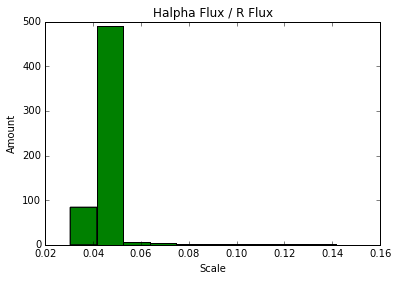

In [67]:
FindScale("A1367")
FindScale("A1367")